# Pymaceutical.Inc Analysis

In [1]:
#importing the necessary libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy as sci

In [15]:
#creating path to files
path_mouse_metadata =  r"C:\Users\jovan\OneDrive\Desktop\Pymaceuticals, Inc. - Module_5\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
path_study_results = r"C:\Users\jovan\OneDrive\Desktop\Pymaceuticals, Inc. - Module_5\Starter_Code\Pymaceuticals\data\Study_results.csv"


#reading the files from above
mouse_metadata = pd.read_csv(path_mouse_metadata)
study_results = pd.read_csv(path_study_results)
#displaying the original files
mouse_metadata
study_results

#mergeing the metadata and results file
merged_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
merged_data.head() #displaying the head of merged_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
#checking for the number of mice in data
num_mice = merged_data["Mouse ID"].value_counts()
count_mice = len(num_mice)

#printing an f-string to show the number of mice
print(f"The number of mice is: {count_mice}")

The number of mice is: 249


In [25]:
#our data should be uniquely identified by Mouse ID and Timepoint
#getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint",]), "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = merged_data.loc[merged_data["Mouse ID"] == 'g989', :]

dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [28]:
#creating a cleaned dataframe that drops the duplicates
cleaned_mice = merged_data[merged_data["Mouse ID"].isin(dup_mice)==False]

#displaying the head of cleaned dataframe
cleaned_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
#making sure the duplicates were dropped in cleaned dataframe
cleaned_df = cleaned_mice["Mouse ID"].value_counts()
cleaned_merged = len(cleaned_df) 

248

# Summary Statistics Table

In [49]:
#grouped by "Drug Regimen"
grouped = cleaned_mice.groupby("Drug Regimen")

# calculating the mean, median, variance, standard deviation, and SEM from 'Tumor Volume (mm3)' within grouped
summary_stats = grouped["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

#renaming the columns
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Vol.',
    'median': 'Median Tumor Vol.',
    'var': 'Tumor Vol. Var',
    'std': 'Tumor Vol. Std. Dev',
    'sem': 'Tumor Vol. SEM'
})

# Display the summary statistics table
summary_stats

,Mean Tumor Vol.,Median Tumor Vol.,Tumor Vol. Var,Tumor Vol. Std. Dev,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Box and Pie Charts using Pandas Method then Matplotlib Method

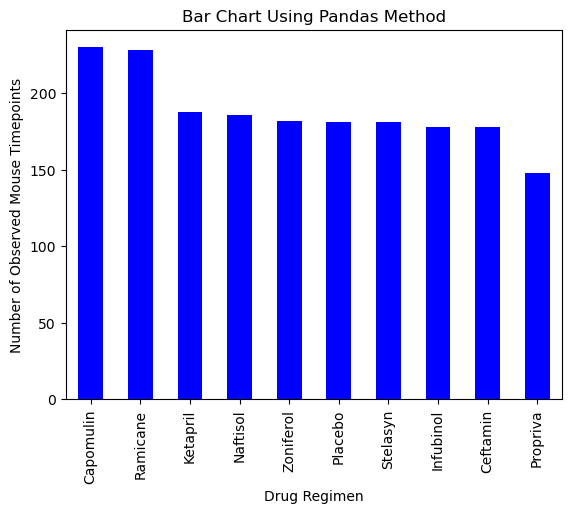

In [55]:
#grouping by drug reg and getting counts
regimen_counts = cleaned_mice['Drug Regimen'].value_counts()

#using Pandas' plot() method
regimen_counts.plot(kind='bar', color='blue')
plt.title("Bar Chart Using Pandas Method")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show()

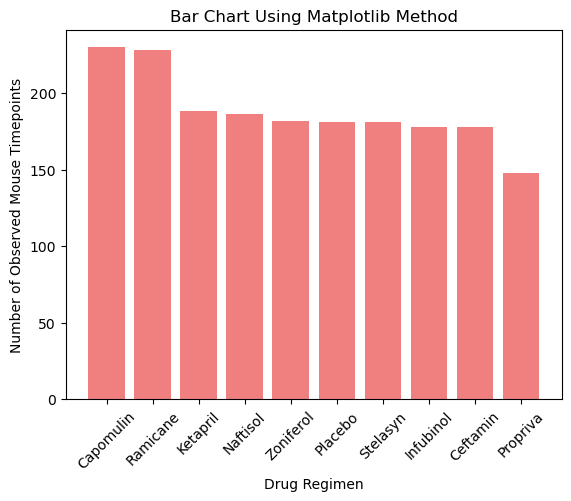

In [57]:
#grouping by drug reg and getting counts
regimen_counts = cleaned_mice['Drug Regimen'].value_counts()

#extracting the regimen names and counts
regimen_names = regimen_counts.index
counts = regimen_counts.values

#creating a bar chart using Matplotlib's pyplot methods
plt.bar(regimen_names, counts, color='lightcoral')
plt.title("Bar Chart Using Matplotlib Method")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()